In [1]:
using OptimalControl

In [57]:
t0 = 0
tf = 10
α  = 5
@def ocp begin
    t ∈ [ t0, tf ], time
    v ∈ R, variable
    x ∈ R², state
    u ∈ R, control
    x(t0) == [ -1, 0 ]
    x(tf) - [ 0, v ] == [0, 0]
    ẋ(t) == [ x₂(t), x₁(t) + α*x₁(t)^2 + u(t) ]
    v^2 + ∫( 0.5u(t)^2 ) → min
end;

In [58]:
# solve the optimal control problem without initial guess
sol5 = solve(ocp, display=false)

# print the number of iterations 
println("Number of iterations: ", sol5.iterations)

# print the optimal variable 
println("Variable v: ", sol5.variable)

# define the mean of an array
mean(x) = sum(x)/length(x)

# print the mean of the optimal control u and states x₁ and x₂
println("Mean of u: ",   mean([sol0.control(t)  for t in sol5.times]))
println("Mean of x₁: ",  mean([sol0.state(t)[1] for t in sol5.times]))
println("Mean of x₂: ",  mean([sol0.state(t)[2] for t in sol5.times]))

Number of iterations: 15
Variable v: 0.031219880636833414
Mean of u: -0.20424716735800025
Mean of x₁: 

-0.1540919623325227


Mean of x₂: 0.09916445485463779


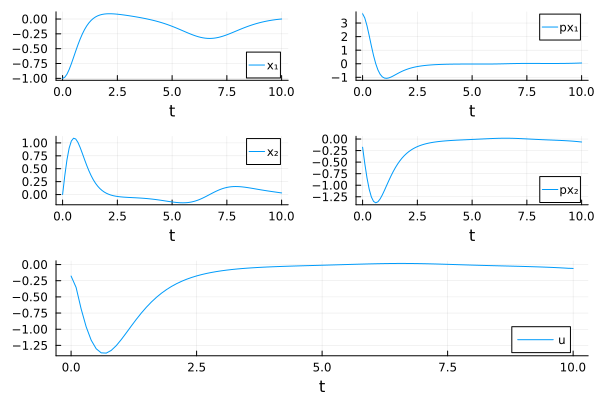

In [59]:
plot(sol5)

In [60]:
# constant initial guess
initial_guess = (state=[-0.2, 0.1], control=-0.2, variable=0.05)
sol = solve(ocp, display=false, init=initial_guess)
println("Number of iterations: ", sol.iterations)

Number of iterations: 10


In [61]:
# the state as a function of time and the rest as constants
# we give a linear guess for x₁ between -1 and 0, and a constant guess for x₂
sol = solve(ocp, display=false, init=(state = t -> [ -1*(tf-t)/tf, 0.1 ], control=-0.2, variable=0.05))
println("Number of iterations: ", sol.iterations)

Number of iterations: 24


In [63]:
# we change the value of α to 10
α = 10

# we first solve it without initial guess
sol = solve(ocp, display=false)
println("Number of iterations: ", sol.iterations)

# we then solve it with the solution with α = 5 as initial guess
# sol = solve(ocp, display=false, init=sol5) there is a bug in this line

Number of iterations: 39
